<a href="https://colab.research.google.com/github/An-Dongsun/Section1_porject/blob/main/Section_1_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#개요
안동선님은 게임 회사의 데이터 팀에 합류했습니다.

다음 분기에 어떤 게임을 설계해야 할까

라는 고민을 해결하기 위해, 기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 하는 것이 여러분의 목표입니다.

아래의 링크를 통해 파일을 다운로드 받으세요.

https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv



#🕹️ Data Description   
Name : 게임의 이름입니다.   
Platform : 게임이 지원되는 플랫폼의 이름입니다.   
Year : 게임이 출시된 연도입니다.   
Genre : 게임의 장르입니다.   
Publisher : 게임을 제작한 회사입니다.   
NA_Sales : 북미지역에서의 출고량입니다.   
EU_Sales : 유럽지역에서의 출고량입니다.   
JP_Sales : 일본지역에서의 출고량입니다.   
Other_Sales : 기타지역에서의 출고량입니다.

#반드시 들어가야 하는 내용.
앞서서 여러분에게 최대한의 자유를 드린다고 했지만, 그래도 발표에 반드시 포함되어야 하는 내용은 다음과 같습니다.

* 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.   
* 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.   
* 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.  
 
위 3가지 내용과 여러분들의 개인적인 분석 목표, 질문을 더하여 프로젝트를 완성하세요.



#데이터 전처리 과정

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#csv파일을 데이터 프레임의 형태로 불러온다.
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')

#첫번째 열은 필요하지 않기 때문에 제거해준다.
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [154]:
#데이터의 타입을 확인한다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


##결측치 제거

In [155]:
#데이터의 결측치 개수를 확인한다.
pd.DataFrame(df.isnull().sum(), columns=["결측치 개수"])

,결측치 개수
Name,0
Platform,0
Year,271
Genre,50
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [156]:
 # 특정열 모두가 결측치일 경우 해당 행 삭제
df = df.dropna()
pd.DataFrame(df.isnull().sum(), columns=["결측치 개수"])

,결측치 개수
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


##Platform 데이터를 확인한다.

In [157]:
#platform의 종류를 확인한다.
df.Platform.unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [158]:
#'2600' 이라는 platform 데이터가 잘못 기입 된것인지 확인하기 위해 데이터를 확인해 본다.
df[df['Platform'] == '2600']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
37,Beamrider,2600,1984.0,Racing,Activision,0.26,0.01,0,0
210,Mountain King,2600,1982.0,Action,CBS Electronics,0.29,0.02,0,0
664,Smurf: Rescue In Gargamel's Castle,2600,1981.0,Action,Coleco,0.55,0.03,0,0.01
820,Fantastic Voyage,2600,1981.0,Action,20th Century Fox Video Games,0.32,0.02,0,0
877,Deadly Duck,2600,1981.0,Shooter,20th Century Fox Video Games,0.21,0.01,0,0
...,...,...,...,...,...,...,...,...,...
16210,Crazy Climber,2600,1981.0,Action,Atari,0.21,0.01,0,0
16263,Frogs And Flies,2600,1981.0,Action,Mattel Interactive,0.33,0.02,0,0
16317,Polaris,2600,1982.0,Action,Tigervision,0.26,0.02,0,0
16363,Pitfall II: Lost Caverns,2600,1983.0,Platform,Activision,1.22,0.07,0,0.02


검색을 통해 '2600'이라는 platform은 아타리 2600이라는 게임기임을 확인하였다.   
최종적으로 Platform 데이터는 이상이 없는 것 같다.

##Year 데이터를 확인한다.

In [159]:
df['Year'].unique()

array([2.008e+03, 2.009e+03, 2.010e+03, 2.005e+03, 2.011e+03, 2.007e+03,
       2.001e+03, 2.003e+03, 2.006e+03, 2.014e+03, 2.015e+03, 2.002e+03,
       1.997e+03, 2.013e+03, 1.996e+03, 2.004e+03, 2.000e+03, 1.984e+03,
       1.998e+03, 2.016e+03, 1.985e+03, 1.999e+03, 9.000e+00, 9.700e+01,
       1.995e+03, 1.993e+03, 2.012e+03, 1.987e+03, 1.982e+03, 1.100e+01,
       1.994e+03, 1.990e+03, 1.500e+01, 1.992e+03, 1.991e+03, 1.983e+03,
       1.988e+03, 1.981e+03, 3.000e+00, 1.989e+03, 9.600e+01, 6.000e+00,
       8.000e+00, 1.986e+03, 1.000e+00, 5.000e+00, 4.000e+00, 1.000e+01,
       9.800e+01, 7.000e+00, 1.600e+01, 8.600e+01, 1.400e+01, 9.500e+01,
       2.017e+03, 1.980e+03, 2.020e+03, 2.000e+00, 1.300e+01, 0.000e+00,
       1.200e+01, 9.400e+01])

In [160]:
#년도의 앞부분을 제외하고 작성된 데이터가 있는 것 같아서 확인해보았다.
df[df['Year'] < 1900]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
74,Age of Empires III: Complete Collection,PC,9.0,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
81,Treasures of the Deep,PS,97.0,Action,Namco Bandai Games,0.1,0.07,0,0.01
213,NASCAR Unleashed,PS3,11.0,Racing,Activision,0.09,0,0,0.01
304,Kung Fu Panda: Showdown of Legendary Legends,PS3,15.0,Action,Little Orbit,0,0.02,0,0
768,NASCAR Thunder 2004,PS2,3.0,Racing,Electronic Arts,0.53,0.41,0,0.14
...,...,...,...,...,...,...,...,...,...
15985,Sugoi Hebereke,SNES,94.0,Fighting,Sunsoft,0,0,0.02,0
16103,Fab 5 Soccer,DS,8.0,Sports,Destineer,0.01,0,0,0
16149,Dragon Ball Z: Burst Limit,X360,8.0,Fighting,Atari,0.24,0.18,0.03,0.05
16394,Point Blank 3,PS,0.0,Shooter,Namco Bandai Games,0.01,0.01,0,0


In [161]:
#Year데이터를 int로 바꿔준다.
df[['Year']] = df[['Year']].astype(int)

#30보다 작은 년도는 2000을 더해주고 80이상인 년도 데이터는 1900 을 더해준다.
def re_year(x):

  if 0 <= x & x < 30 :
    return x + 2000
  elif 50 <= x & x <= 99 :
    return x + 1900
  else :
    return x

df['Year'] = df['Year'].apply(re_year)
df['Year'].unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980, 2020])

##Genre 데이터를 확인한다.

In [162]:
df['Genre'].unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

##출고량 데이터에 00K, 0.00M과 같이 단위가 붙어있는 데이터들이 존재함을 확인했다.

In [163]:
df['NA_Sales'].unique()

array(['0.04', '0.17', '0', '0.12', '0.02', '0.07', '480K', '0.14',
       '0.01', '0.57', '0.06', '0.08', '0.48', '0.03', '0.05', '0.29',
       '0.19', '0.3', '0.26', '0.11', '0.18', '0.33', '0.51', '60K',
       '0.13', '0.34', '0.25', '0.41', '0.52', '0.22', '0.35', '0.1',
       '0.67', '0.59', '0.36', '0.21', '1.19', '5.91', '1.98', '0.09',
       '0K', '0.5', '0.94', '0.16', '0.63', '0.43', '0.2', '1.23', '0.44',
       '0.42', '0.97', '2.67', '0.28', '6.05', '0.47', '0.49', '0.62',
       '0.24', '0.72', '1.74', '0.46', '0.65', '0.32', '1.53', '0.23',
       '0.53', '0.37', '1.26', '0.39', '0.58', '1.94', '2.31', '1.03',
       '0.82', '0.4', '0.93', '0.56', '0.96', '1.64', '0.69', '1.25',
       '0.27', '0.92', '0.58M', '1.24', '0.25M', '0.86', '0.73', '0.55',
       '1.54', '1.02', '1.27', '0.54', '0.15', '1.09', '3.44', '2.29',
       '0.88', '5.55M', '1.37', '2.3', '0.99', '1.15', '0.98', '0.75',
       '0.74', '0.7', '0.14M', '0.45', '1.2', '1.41', '0.68', '1.23M',
       

###출고량 데이터가 전채적으로 소수점 두자리인 것을 보아 M(Million, 백만 단위)로 데이터를 전처리 하겠다.

In [164]:
#출고량 데이터가 전채적으로 소수점 두자리인 것을 보아 M(Million, 백만 단위)로 데이터를 전처리 하겠다.

def toInt(string):
    try : # 숫자만 있어서 float로 데이터 타입을 변경할 수 있는 경우 작동한다.
      return float(string)*1000000

    except : # 위에서 error가 발생할 때(K나 M을 포함한 경우) 작동한다.
        try : #문자열이 K를 포함하는 경우 작동한다.
          return float(string.replace('K',''))*1000
      
        except : #문자열이 M을 포함하는 경우 작동한다.
          return float(string.replace('M',''))*1000000
    
      

df['NA_Sales'] = df['NA_Sales'].apply(toInt)
df['EU_Sales'] = df['EU_Sales'].apply(toInt)
df['JP_Sales'] = df['JP_Sales'].apply(toInt)
df['Other_Sales'] = df['Other_Sales'].apply(toInt)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB


#1. 지역에 따라서 선호하는 게임 장르가 다를까?

##1-1.두 변수간에 연관성이 있는지 없는지  확인할 때 사용하는 Two sample Chi-square test를 이용해서 가설검증을 할 것이다.

* 귀무가설 : 데이터에서 지역과 Genre라는 두 변수는 서로 연관이 없다.
* 대립가설 : 데이터에서 지역과 Genre라는 두 변수는 서로 연관이 있다.

In [166]:
# 가설검증을 위해서 필요한 데이터만 뽑아서 새로운 데이터프레임을 만들어준다.
#전처리를 끝낸 df의 변형을 막기 위해 복사한 데이터프레임을 이용해서 진행한다.
df1 = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df_Genre = df1.groupby('Genre')
df_Genre = df_Genre.sum()
df_Genre = df_Genre.T
df_Genre

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,858750000.0,101790000.0,220350000.0,394730000.0,445380000.0,121580000.0,354700000.0,318760000.0,574480000.0,181430000.0,667260000.0,67830000.0
EU_Sales,513640000.0,63660000.0,99900000.0,208150000.0,200630000.0,50470000.0,235020000.0,183090000.0,310230000.0,112990000.0,370970000.0,44820000.0
JP_Sales,156600000.0,51870000.0,87140000.0,104180000.0,130530000.0,56240000.0,56320000.0,342930000.0,38180000.0,63540000.0,134760000.0,49100000.0
Other_Sales,183990000.0,16700000.0,36150000.0,72640000.0,51450000.0,12440000.0,76510000.0,56730000.0,101860000.0,31320000.0,132350000.0,11230000.0


In [167]:
#지역에 대해서 one-sample chi-square test를 실행
from scipy.stats import chi2_contingency

chi1 = chi2_contingency(df_Genre, correction = True)
chi1

(684336340.5169278,
 0.0,
 33,
 array([[8.42668371e+08, 1.15121748e+08, 2.18191181e+08, 3.83558786e+08,
         4.07314145e+08, 1.18422607e+08, 3.55444916e+08, 4.43480930e+08,
         5.04106536e+08, 1.91498992e+08, 6.42137522e+08, 8.50942655e+07],
        [4.68299745e+08, 6.39771079e+07, 1.21256330e+08, 2.13156786e+08,
         2.26358455e+08, 6.58115084e+07, 1.97532943e+08, 2.46457579e+08,
         2.80149309e+08, 1.06422565e+08, 3.56857867e+08, 4.72898048e+07],
        [2.48746271e+08, 3.39826515e+07, 6.44075945e+07, 1.13222261e+08,
         1.20234577e+08, 3.49570281e+07, 1.04923361e+08, 1.30910607e+08,
         1.48806607e+08, 5.65283591e+07, 1.89551809e+08, 2.51188747e+07],
        [1.53265612e+08, 2.09384923e+07, 3.96848939e+07, 6.97621676e+07,
         7.40828230e+07, 2.15388567e+07, 6.46487805e+07, 8.06608845e+07,
         9.16875480e+07, 3.48300841e+07, 1.16792802e+08, 1.54770550e+07]]))

**Two sample Chi-square test결과 p-value 값이 0.05보다 굉장히 작게 나왔다.  
따라서 귀무가설이 기각되고 "데이터에서 지역과 Genre라는 두 변수는 서로 연관이 있다."는 사실을 알 수 있게 된다.**

##1-2.위에서 얻은 결과를 확인하기 위해서 데이터를 시각화 해보겠다.

### 그래프를 편하게 그리기 위해서 데이터프레임을 tidy data로 바꿔주겠다.

In [168]:
#index에 있는 국가 데이터를 빼온다.
df_Genre_tidy = df_Genre.reset_index()

In [169]:
df_Genre_tidy

Genre,index,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,NA_Sales,858750000.0,101790000.0,220350000.0,394730000.0,445380000.0,121580000.0,354700000.0,318760000.0,574480000.0,181430000.0,667260000.0,67830000.0
1,EU_Sales,513640000.0,63660000.0,99900000.0,208150000.0,200630000.0,50470000.0,235020000.0,183090000.0,310230000.0,112990000.0,370970000.0,44820000.0
2,JP_Sales,156600000.0,51870000.0,87140000.0,104180000.0,130530000.0,56240000.0,56320000.0,342930000.0,38180000.0,63540000.0,134760000.0,49100000.0
3,Other_Sales,183990000.0,16700000.0,36150000.0,72640000.0,51450000.0,12440000.0,76510000.0,56730000.0,101860000.0,31320000.0,132350000.0,11230000.0


In [170]:
#tidy data로 만들어준다.
df_Genre_tidy = df_Genre_tidy.melt(id_vars = 'index', value_vars = ['Action','Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy'])
df_Genre_tidy = pd.DataFrame(df_Genre_tidy)
df_Genre_tidy.head(10)

,index,Genre,value
0,NA_Sales,Action,858750000.0
1,EU_Sales,Action,513640000.0
2,JP_Sales,Action,156600000.0
3,Other_Sales,Action,183990000.0
4,NA_Sales,Adventure,101790000.0
5,EU_Sales,Adventure,63660000.0
6,JP_Sales,Adventure,51870000.0
7,Other_Sales,Adventure,16700000.0
8,NA_Sales,Fighting,220350000.0
9,EU_Sales,Fighting,99900000.0


In [171]:
#column name을 바꿔준다.
new_header = ['Country', 'Genre', 'sales rate']
df_Genre_tidy.columns = new_header
#sales rate를 기준으로 정렬한다.
df_Genre_tidy = df_Genre_tidy.sort_values(by="sales rate", ascending=False)
df_Genre_tidy.head()

,Country,Genre,sales rate
0,NA_Sales,Action,858750000.0
40,NA_Sales,Sports,667260000.0
32,NA_Sales,Shooter,574480000.0
1,EU_Sales,Action,513640000.0
16,NA_Sales,Platform,445380000.0


###NA_Sales 데이터의 ranking을 구한다.

In [172]:
df_NA_Sales = df_Genre_tidy[df_Genre_tidy['Country'] == 'NA_Sales']
df_NA_Sales['rank'] = df_NA_Sales['sales rate'].rank(ascending = False)
df_NA_Sales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country,Genre,sales rate,rank
0,NA_Sales,Action,858750000.0,1.0
40,NA_Sales,Sports,667260000.0,2.0
32,NA_Sales,Shooter,574480000.0,3.0
16,NA_Sales,Platform,445380000.0,4.0
12,NA_Sales,Misc,394730000.0,5.0
24,NA_Sales,Racing,354700000.0,6.0
28,NA_Sales,Role-Playing,318760000.0,7.0
8,NA_Sales,Fighting,220350000.0,8.0
36,NA_Sales,Simulation,181430000.0,9.0
20,NA_Sales,Puzzle,121580000.0,10.0


NA_Sales 지역의 판매량 순위 :    
1위 : Action , 2위 : Sports , 3위 : Shooter, 4위 : Platform

###EU_Sales 데이터의 Ranking을 구한다.

In [173]:
df_EU_Sales = df_Genre_tidy[df_Genre_tidy['Country'] == 'EU_Sales']
df_EU_Sales['rank'] = df_EU_Sales['sales rate'].rank(ascending = False)
df_EU_Sales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country,Genre,sales rate,rank
1,EU_Sales,Action,513640000.0,1.0
41,EU_Sales,Sports,370970000.0,2.0
33,EU_Sales,Shooter,310230000.0,3.0
25,EU_Sales,Racing,235020000.0,4.0
13,EU_Sales,Misc,208150000.0,5.0
17,EU_Sales,Platform,200630000.0,6.0
29,EU_Sales,Role-Playing,183090000.0,7.0
37,EU_Sales,Simulation,112990000.0,8.0
9,EU_Sales,Fighting,99900000.0,9.0
5,EU_Sales,Adventure,63660000.0,10.0


EU_Sales 지역의 판매량 순위 :   
1위 : Action , 2위 : Sports , 3위 : Shooter, 4위 : Racing

### JP_Sales 데이터의 Ranking을 구한다.

In [174]:
df_JP_Sales = df_Genre_tidy[df_Genre_tidy['Country'] == 'JP_Sales']
df_JP_Sales['rank'] = df_JP_Sales['sales rate'].rank(ascending = False)
df_JP_Sales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country,Genre,sales rate,rank
30,JP_Sales,Role-Playing,342930000.0,1.0
2,JP_Sales,Action,156600000.0,2.0
42,JP_Sales,Sports,134760000.0,3.0
18,JP_Sales,Platform,130530000.0,4.0
14,JP_Sales,Misc,104180000.0,5.0
10,JP_Sales,Fighting,87140000.0,6.0
38,JP_Sales,Simulation,63540000.0,7.0
26,JP_Sales,Racing,56320000.0,8.0
22,JP_Sales,Puzzle,56240000.0,9.0
6,JP_Sales,Adventure,51870000.0,10.0


JP_Sales지역의 판매량 순위 :   
1위 : Role-Playing , 2위 : Action , 3위 : Sports, 4위 : Platform

###Other_Sales 데이터의 Ranking을 구한다.

In [175]:
df_Other_Sales = df_Genre_tidy[df_Genre_tidy['Country'] == 'Other_Sales']
df_Other_Sales['rank'] = df_Other_Sales['sales rate'].rank(ascending = False)
df_Other_Sales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country,Genre,sales rate,rank
3,Other_Sales,Action,183990000.0,1.0
43,Other_Sales,Sports,132350000.0,2.0
35,Other_Sales,Shooter,101860000.0,3.0
27,Other_Sales,Racing,76510000.0,4.0
15,Other_Sales,Misc,72640000.0,5.0
31,Other_Sales,Role-Playing,56730000.0,6.0
19,Other_Sales,Platform,51450000.0,7.0
11,Other_Sales,Fighting,36150000.0,8.0
39,Other_Sales,Simulation,31320000.0,9.0
7,Other_Sales,Adventure,16700000.0,10.0


Other_Sales 지역의 판매량 순위 :   
1위 : Action , 2위 : Sports , 3위 : Shooter, 4위 : Racing

### bar plot으로 시각화하기

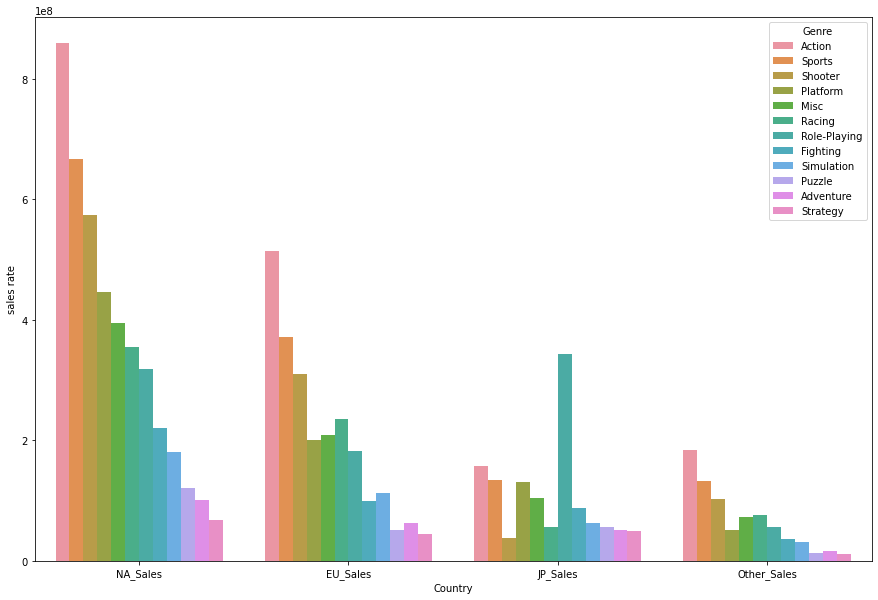

In [176]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.barplot(x = 'Country', y = 'sales rate', hue = 'Genre', data = df_Genre_tidy)

#1번 결론

두 변수간에 연관성이 있는지 없는지 확인할 때 사용하는 Two sample Chi-square test를 이용해서 가설검증을 한 결과 두 변수는 서로 연관이 있다는 결과를 얻었습니다.
이를 시각화 해서 한눈에 파악하기 쉽게 만든것이 다음의 그래프입니다.

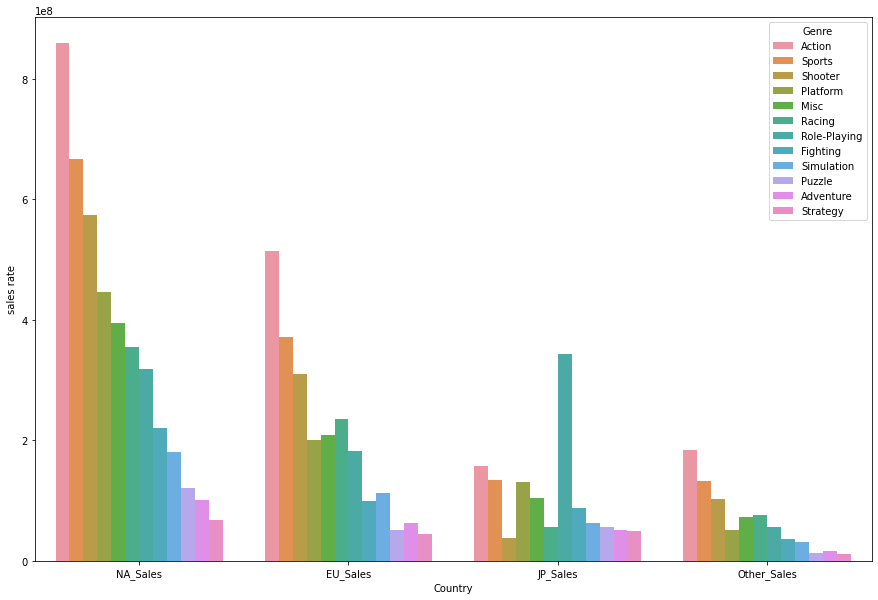

NA_Sales 지역의 판매량 순위 :
1위 : Action , 2위 : Sports , 3위 : Shooter, 4위 : Platform   
EU_Sales 지역의 판매량 순위 :
1위 : Action , 2위 : Sports , 3위 : Shooter, 4위 : Racing   
JP_Sales지역의 판매량 순위 :
1위 : Role-Playing , 2위 : Action , 3위 : Sports, 4위 : Platform   
Other_Sales 지역의 판매량 순위 :
1위 : Action , 2위 : Sports , 3위 : Shooter, 4위 : Racing

지역에 따라서 선호하는 게임 장르의 순위에서 중위권 ~ 하위권은 지역에 따라 차이를 보이지만,
전 세계적으로 상위권을 차지하는 장르는 Action, Sports, Shooter, platform 장르의 게임이며 일본에서는 특이하게 Role-Playing의 인기가 높다.  

#2.연도별 게임의 트렌드가 있을까?

##2-1. 두 변수간에 연관성이 있는지 없는지 확인할 때 사용하는 Two sample Chi-square test를 이용해서 가설검증을 할 것이다.

귀무가설 : 데이터에서 지역과 Genre라는 두 변수는 서로 연관이 없다.   
대립가설 : 데이터에서 지역과 Genre라는 두 변수는 서로 연관이 있다.

In [262]:
df_Genre_year = df[['Year', 'Genre']]
df_Genre_year['Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

#피벗테이블로 만들어준다.
df_Genre_year = pd.pivot_table(df_Genre_year,       # 피벗할 데이터프레임
                                index = 'Genre',    # 행 위치에 들어갈 열
                                columns = 'Year',   # 열 위치에 들어갈 열
                                values = 'Sales',   # 데이터로 사용할 열
                                aggfunc = 'sum')    # 데이터 집계함수

#없는 값은 0이므로 결측치를 0으로 채워준다.
df_Genre_year = df_Genre_year.fillna(0)
df_Genre_year = df_Genre_year.sort_values(by= 2009 , ascending=False)

df_Genre_year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Genre,,,,,,,,,,,,,,,,,,,,,
Sports,0.0,780000.0,1060000.0,3200000.0,6170000.0,1960000.0,5580000.0,3710000.0,3600000.0,5720000.0,...,138590000.0,92020000.0,57060000.0,30900000.0,41540000.0,46640000.0,41490000.0,14630000.0,0.0,0.0
Action,340000.0,14790000.0,6500000.0,2860000.0,1850000.0,3520000.0,13740000.0,1110000.0,1740000.0,4650000.0,...,138320000.0,117500000.0,119000000.0,120780000.0,125210000.0,99010000.0,68250000.0,19840000.0,10000.0,0.0
Misc,2700000.0,0.0,870000.0,2140000.0,1450000.0,0.0,0.0,0.0,0.0,1280000.0,...,76900000.0,88400000.0,55770000.0,22930000.0,25660000.0,23730000.0,11660000.0,1150000.0,0.0,0.0
Shooter,7070000.0,10020000.0,3810000.0,490000.0,31100000.0,1000000.0,3890000.0,690000.0,510000.0,1190000.0,...,69840000.0,77440000.0,99350000.0,72840000.0,62730000.0,65990000.0,66120000.0,18170000.0,0.0,0.0
Role-Playing,0.0,0.0,0.0,0.0,0.0,0.0,2520000.0,4650000.0,5880000.0,2200000.0,...,47960000.0,70560000.0,53320000.0,47770000.0,30540000.0,45880000.0,36430000.0,6750000.0,40000.0,0.0
Platform,0.0,6920000.0,5030000.0,6930000.0,690000.0,43170000.0,9390000.0,1740000.0,27730000.0,20660000.0,...,40950000.0,31980000.0,28120000.0,18540000.0,25090000.0,8870000.0,6050000.0,2080000.0,0.0,0.0
Racing,0.0,480000.0,1570000.0,0.0,5950000.0,0.0,1960000.0,0.0,2140000.0,0.0,...,34090000.0,34930000.0,34960000.0,14430000.0,13020000.0,16710000.0,7920000.0,1670000.0,0.0,0.0
Simulation,0.0,440000.0,0.0,0.0,0.0,40000.0,0.0,0.0,30000.0,0.0,...,33550000.0,21900000.0,15310000.0,13370000.0,8680000.0,5540000.0,5610000.0,390000.0,0.0,290000.0
Fighting,770000.0,0.0,0.0,0.0,0.0,1050000.0,0.0,5420000.0,0.0,0.0,...,32180000.0,14880000.0,22110000.0,9530000.0,7230000.0,16150000.0,7780000.0,3850000.0,0.0,0.0


In [263]:
#지역에 대해서 one-sample chi-square test를 실행
chi2 = chi2_contingency(df_Genre_year, correction = True)
chi2

(3401604559.7475643,
 0.0,
 418,
 array([[1.62210154e+06, 5.31953889e+06, 4.30572542e+06, 2.50471562e+06,
         7.50669235e+06, 8.04341713e+06, 5.52826519e+06, 3.23525768e+06,
         7.03854907e+06, 1.09506763e+07, 7.36058394e+06, 4.80517765e+06,
         1.13517290e+07, 6.85665901e+06, 1.18109269e+07, 1.31363389e+07,
         2.96286985e+07, 2.99775696e+07, 3.80433503e+07, 3.71473181e+07,
         3.00476420e+07, 4.89925357e+07, 5.87519812e+07, 5.32102979e+07,
         6.09525528e+07, 6.81521193e+07, 7.67069159e+07, 9.07363051e+07,
         1.00846113e+08, 9.92702291e+07, 8.81346809e+07, 7.67590974e+07,
         5.39796034e+07, 5.27227729e+07, 5.02553298e+07, 3.90362911e+07,
         1.05615509e+07, 7.45451077e+03, 4.32361625e+04],
        [2.12866188e+06, 6.98075883e+06, 5.65034515e+06, 3.28690438e+06,
         9.85093069e+06, 1.05552673e+07, 7.25466752e+06, 4.24558482e+06,
         9.23659261e+06, 1.43704242e+07, 9.65919460e+06, 6.30576953e+06,
         1.48967202e+07, 8.997900

Two sample Chi-square test결과 p-value 값이 0.05보다 굉장히 작게 나왔다.
따라서 귀무가설이 기각되고 "데이터에서 지역과 Genre라는 두 변수는 서로 연관이 있다."는 사실을 알 수 있게 된다.

##2-2.게임 발매 연도, 장르, 출고량 데이터를 가져와서 10년 단위로 끊어서 새로운 데이터 프레임을 만든다.

In [177]:
#1980년대 데이터를 모은다.
df1980 = df[(df['Year'] < 1990) & (df['Year'] >= 1980)]
df1980 = df1980[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df1980 = df1980.groupby(['Genre']).sum()
df1980['Sales'] = df1980['NA_Sales'] + df1980['EU_Sales'] + df1980['JP_Sales'] + df1980['Other_Sales']
df1980['rate'] = round(df1980['Sales'] / df1980['Sales'].sum(), 3) *100

#index에 있는 Genre 데이터를 빼온다.
df1980 = df1980.reset_index()
#Sales를 기준으로 정렬한다.
df1980 = df1980.sort_values(by="Sales", ascending=False)

In [178]:
#1990년대 데이터를 모은다.
df1990 = df[(df['Year'] < 2000) & (df['Year'] >= 1990)]
df1990 = df1990[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df1990 = df1990.groupby(['Genre']).sum()
df1990['Sales'] = df1990['NA_Sales'] + df1990['EU_Sales'] + df1990['JP_Sales'] + df1990['Other_Sales']
df1990['rate'] = round(df1990['Sales'] / df1990['Sales'].sum(), 3) *100

#index에 있는 Genre 데이터를 빼온다.
df1990 = df1990.reset_index()
#Sales를 기준으로 정렬한다.
df1990 = df1990.sort_values(by="Sales", ascending=False)

In [179]:
#2000년대 데이터를 모은다.
df2000 = df[(df['Year'] < 2010) & (df['Year'] >= 2000)]
df2000 = df2000[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df2000 = df2000.groupby(['Genre']).sum()
df2000['Sales'] = df2000['NA_Sales'] + df2000['EU_Sales'] + df2000['JP_Sales'] + df2000['Other_Sales']
df2000['rate'] = round(df2000['Sales'] / df2000['Sales'].sum(), 3) *100

#index에 있는 Genre 데이터를 빼온다.
df2000 = df2000.reset_index()
#Sales를 기준으로 정렬한다.
df2000 = df2000.sort_values(by="Sales", ascending=False)

In [180]:
#2010년대 데이터를 모은다.
df2010 = df[(df['Year'] < 2020) & (df['Year'] >= 2010)]
df2010 = df2010[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df2010 = df2010.groupby(['Genre']).sum()
df2010['Sales'] = df2010['NA_Sales'] + df2010['EU_Sales'] + df2010['JP_Sales'] + df2010['Other_Sales']
df2010['rate'] = round(df2010['Sales'] / df2010['Sales'].sum(), 3) *100

#index에 있는 Genre 데이터를 빼온다.
df2010 = df2010.reset_index()
#Sales를 기준으로 정렬한다.
df2010 = df2010.sort_values(by="Sales", ascending=False)

In [181]:
#2020년대 데이터를 모은다.
df2020 = df[(df['Year'] < 2030) & (df['Year'] >= 2020)]
df2020 = df2020[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df2020 = df2020.groupby(['Genre']).sum()
df2020['Sales'] = df2020['NA_Sales'] + df2020['EU_Sales'] + df2020['JP_Sales'] + df2020['Other_Sales']
df2020['rate'] = round(df2020['Sales'] / df2020['Sales'].sum(), 3) *100

#index에 있는 Genre 데이터를 빼온다.
df2020 = df2020.reset_index()
df2020

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales,rate
0,Simulation,270000.0,0.0,0.0,20000.0,290000.0,100.0


##2-3. 10년단위로 묶은 데이터들을 Pie 플롯을 이용해 시각화하여 장르에 따른 게임의 출고량 변화를 살펴본다. 

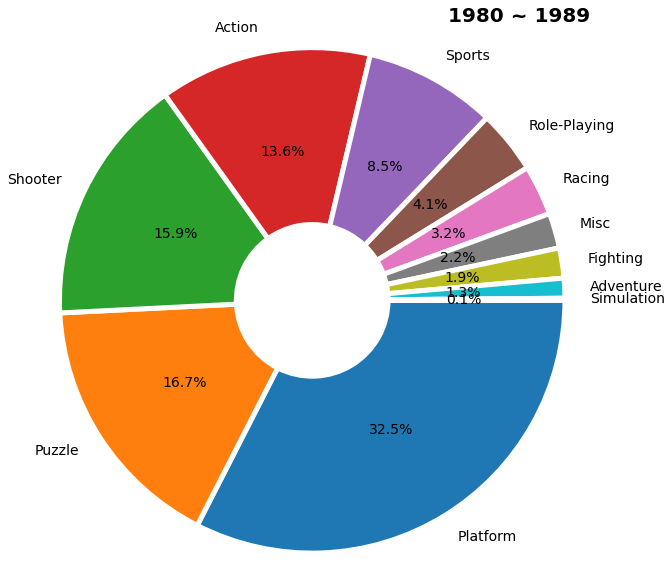

In [182]:
# 1980년대 파이차트
group_names = df1980.Genre
group_sizes = df1980.Sales
explode = df1980.rate
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

fig = plt.figure(figsize=(10, 10))
plt.pie(group_sizes, 
        labels = group_names,
        autopct = '%.1f%%',
        counterclock = False,
        wedgeprops = wedgeprops,
        textprops = {'fontsize': 14}) 

title_font = {
    'fontsize': 20,
    'fontweight': 'bold'}

plt.axis('equal')
plt.title('1980 ~ 1989', fontdict=title_font, loc = 'right')
plt.show()

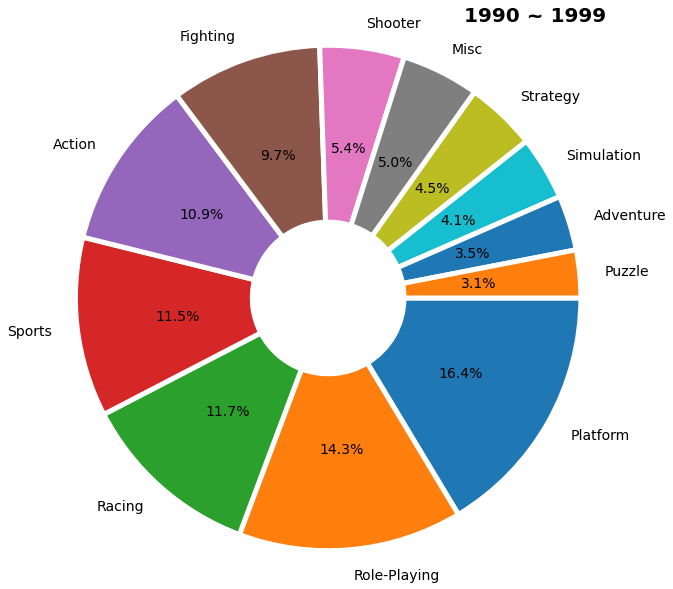

In [183]:
# 1990년대 파이차트
group_names = df1990.Genre
group_sizes = df1990.Sales
explode = df1990.rate
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

fig = plt.figure(figsize=(10, 10))
plt.pie(group_sizes, 
        labels = group_names,
        autopct = '%.1f%%',
        counterclock = False,
        wedgeprops = wedgeprops,
        textprops = {'fontsize': 14}) 

title_font = {
    'fontsize': 20,
    'fontweight': 'bold'}

plt.axis('equal')
plt.title('1990 ~ 1999', fontdict=title_font, loc = 'right')
plt.show()

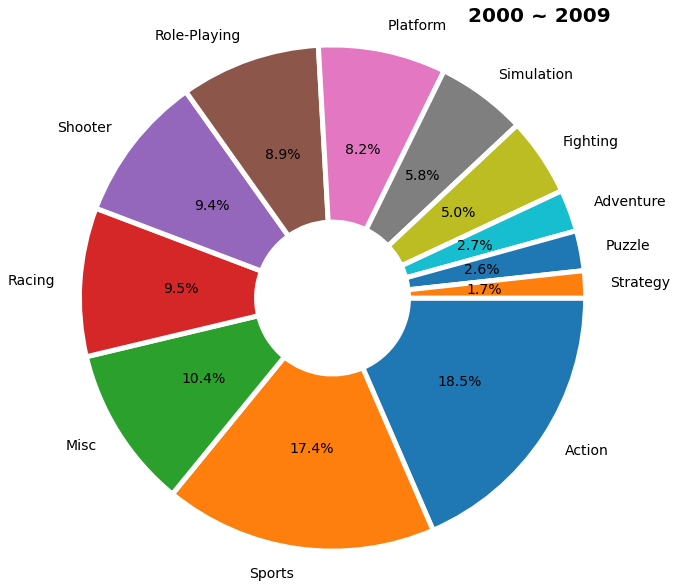

In [184]:
# 2000년대 파이차트
group_names = df2000.Genre
group_sizes = df2000.Sales
explode = df2000.rate
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

fig = plt.figure(figsize=(10, 10))
plt.pie(group_sizes, 
        labels = group_names,
        autopct = '%.1f%%',
        counterclock = False,
        wedgeprops = wedgeprops,
        textprops = {'fontsize': 14}) 

title_font = {
    'fontsize': 20,
    'fontweight': 'bold'}

plt.axis('equal')
plt.title('2000 ~ 2009', fontdict=title_font, loc = 'right')
plt.show()

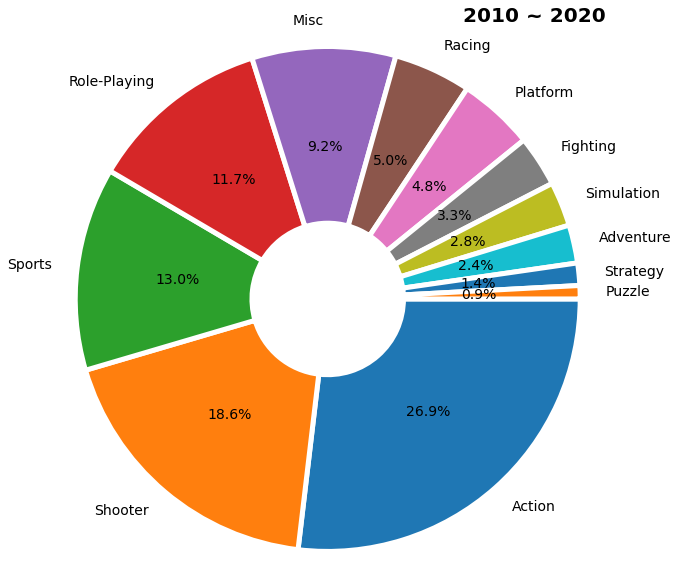

In [185]:
# 2010년대 파이차트
group_names = df2010.Genre
group_sizes = df2010.Sales
explode = df2010.rate
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

fig = plt.figure(figsize=(10, 10))
plt.pie(group_sizes, 
        labels = group_names,
        autopct = '%.1f%%',
        counterclock = False,
        wedgeprops = wedgeprops,
        textprops = {'fontsize': 14}) 

title_font = {
    'fontsize': 20,
    'fontweight': 'bold'}

plt.axis('equal')
plt.title('2010 ~ 2020', fontdict=title_font, loc = 'right')
plt.show()

In [186]:
df2020

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales,rate
0,Simulation,270000.0,0.0,0.0,20000.0,290000.0,100.0


2020년대 자료는 부정확 함으로 제외했습니다.

##2-4.시각화를 위해 누적 barh plot을 그려본다.

In [187]:
df_year1980 = df1980[[ 'Genre','Sales']]
df_year1990 = df1990[[ 'Genre','Sales']]
df_year2000 = df2000[[ 'Genre','Sales']]
df_year2010 = df2010[[ 'Genre','Sales']]

In [188]:
df_year_1900 = df_year1980.merge(df_year1990, on = 'Genre')
df_year_2000 = df_year2000.merge(df_year2010, on = 'Genre')
df_year = df_year_1900.merge(df_year_2000, on = 'Genre')
df_year.columns = ['Genre', '1980 ~ 1989','1990 ~ 1999','2000 ~ 2009','2010 ~ 2019']
df_year = df_year.T

#첫번째 줄에 column name이 있어서 이걸로 column name을 설정해준다.
new_header_year = df_year.iloc[0]
df_year = df_year[1:]
df_year.columns = new_header_year
df_year = df_year.reset_index()

df_year

Genre,index,Platform,Puzzle,Shooter,Action,Sports,Role-Playing,Racing,Misc,Fighting,Adventure,Simulation
0,1980 ~ 1989,122260000.0,62750000.0,59770000.0,51100000.0,31780000.0,15250000.0,12100000.0,8440000.0,7240000.0,4780000.0,510000.0
1,1990 ~ 1999,208870000.0,38940000.0,68890000.0,139150000.0,146470000.0,182770000.0,148810000.0,63430000.0,123510000.0,44800000.0,52040000.0
2,2000 ~ 2009,376130000.0,117860000.0,433450000.0,853130000.0,802810000.0,412200000.0,438000000.0,478530000.0,231260000.0,123590000.0,265640000.0
3,2010 ~ 2019,120730000.0,21180000.0,462640000.0,669600000.0,324280000.0,291290000.0,123640000.0,229300000.0,81530000.0,60850000.0,70800000.0


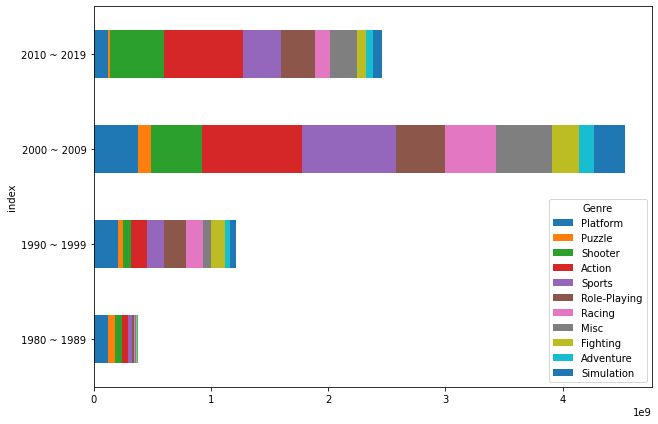

In [189]:
# Stacked Bar Chart
df_year.plot.barh(x = 'index', stacked=True, figsize=(10,7))

##2-5. heatmap plot을 이용해서 시각화 해본다.

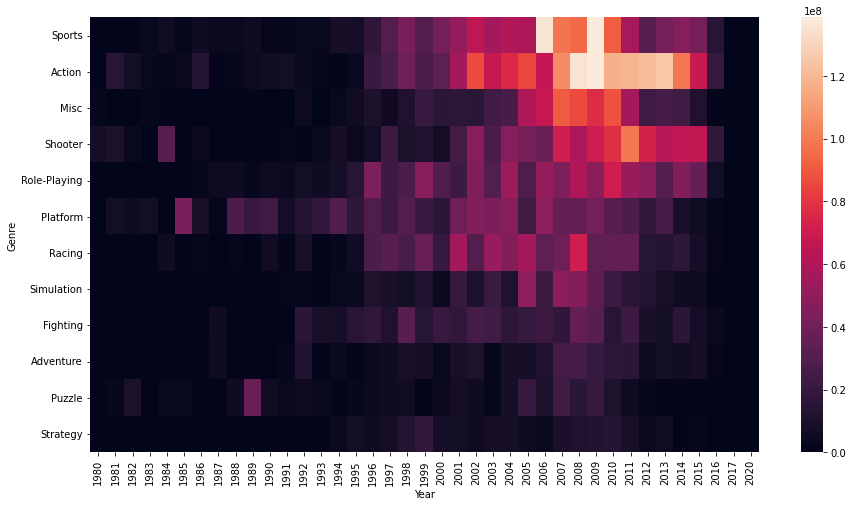

In [264]:
fig = plt.figure(figsize=(15, 8))
ax=sns.heatmap(df_Genre_year)

#2번 결과

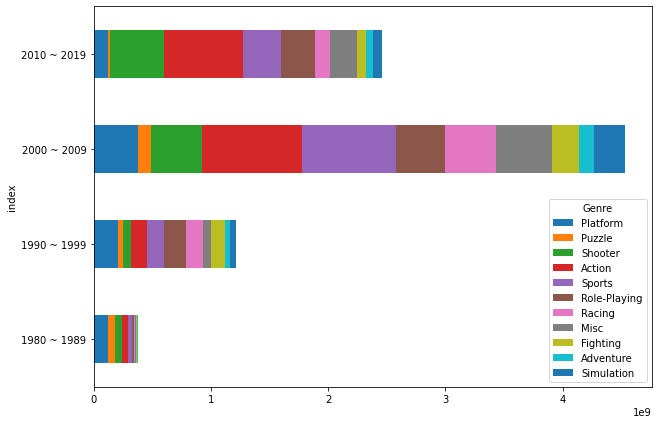

10년 단위로 묶은 판매량 데이터를 누적 막대그래프로 그려서 시각화 해 보았으나 직관적으로 파악하기 어려웠다.    
하지만 2009년까지 게임의 총 출하량이 폭발적으로 증가했으나 2010년대에는 출하량이 반으로 떨어지는 것을 보고 현재 분석하고 있는 데이터는 오프라인에서 판매된 게임들에 대한 데이터인 것 같다는 생각을 했다.

pie차트를 이용해서 시각화를 하니까 직관적으로 파악하기 쉬워졌다.    
1980년대 
Platform : 32.5%,
Puzzle : 16.7%
Shooter : 15.9%
Action : 13.6%
Sports : 8.5%

1990년대
Platform : 16.4%
Role-playing: 14.3%
Puzzle : 11.7%
Sports : 11.5%
Action : 10.9%

2000년대
Action : 18.5%
Sports : 17.4%
Music : 10.4%
Racing : 9.5%
Shooter : 9.4%

2010년대
Action : 26.9%
Shooter : 18.6%
Sports : 13.0%
Role-playing: 11.7%
Music : 9.2%

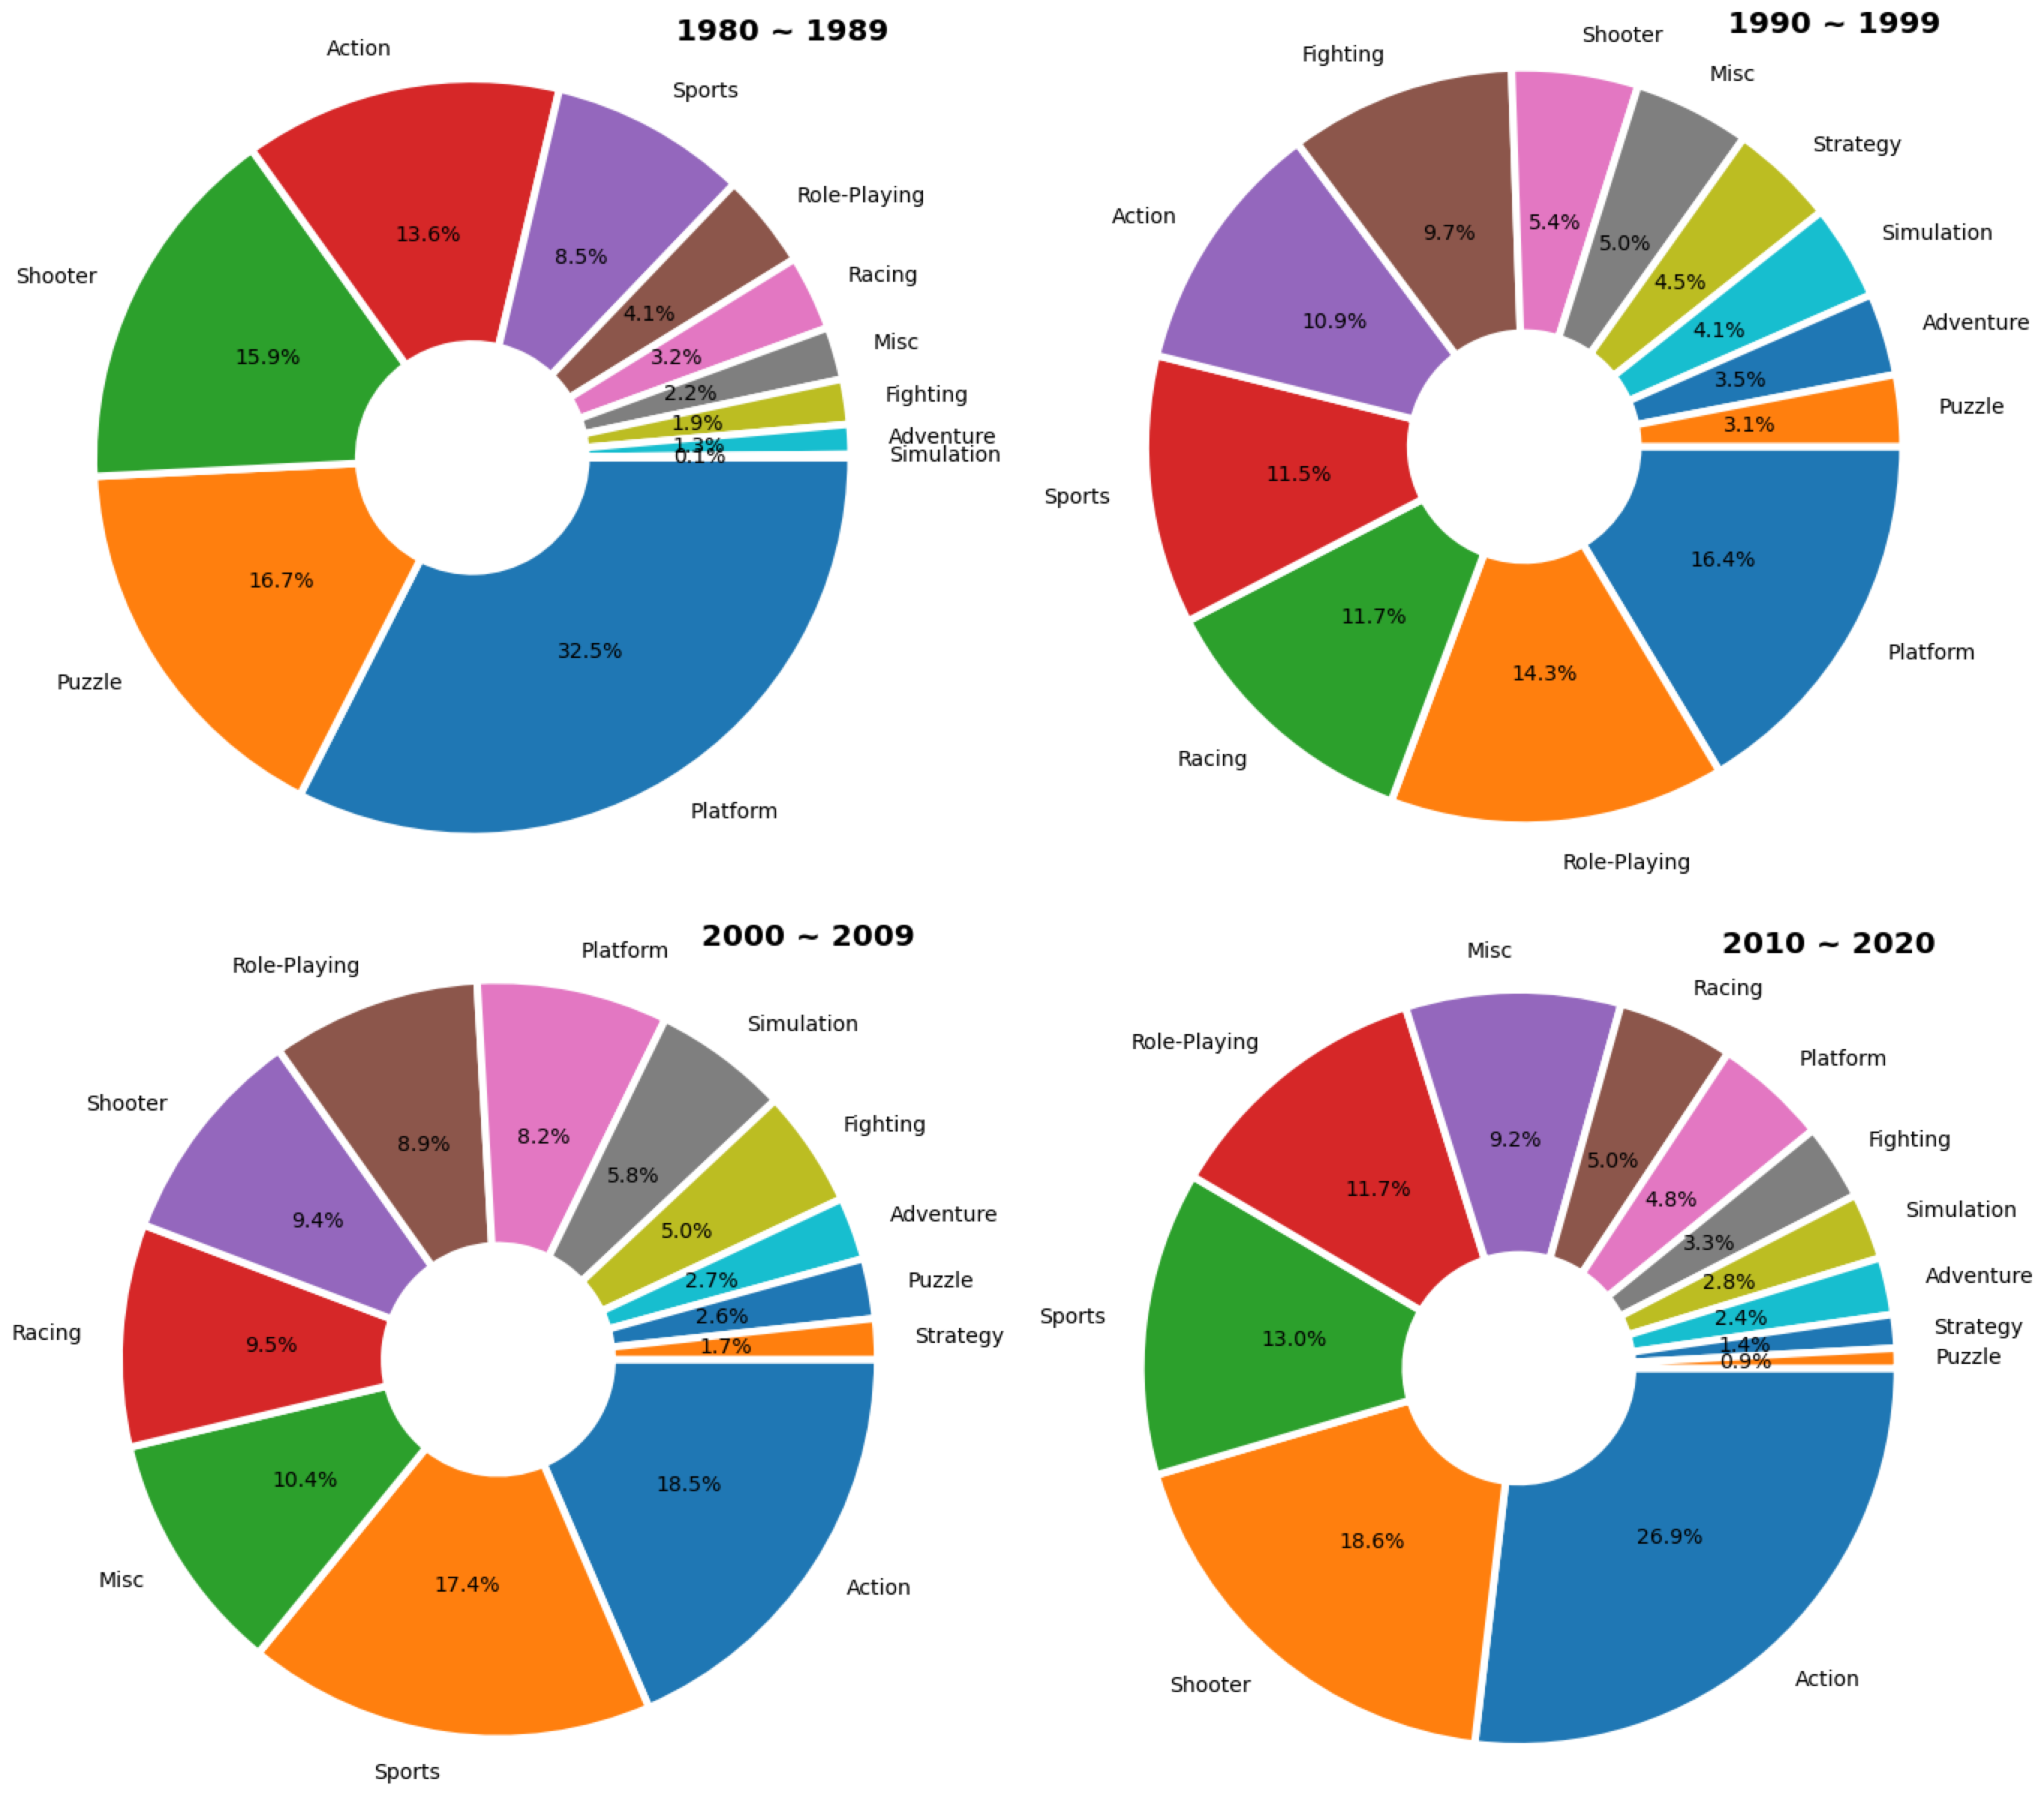

1980년대에는 Platform, Puzzle, Shoote, Action, Sports 5가지 장르의 게임이 전체 출고량의 87.1%를 차지하지만 1990년대는 다양한 장르의 게임들이 골고루 출고되기 시작했다.
2000년대는 Action, Sport장르의 게임이 상대적으로 우세하고 나머지 장르들은 골고루 출고 되었다.
2010년대는 Action, shooter 장르의 게임이 트렌드의 중심이고 Sports, Role-playing, Music 세가지 장르 또한 트렌디하다.

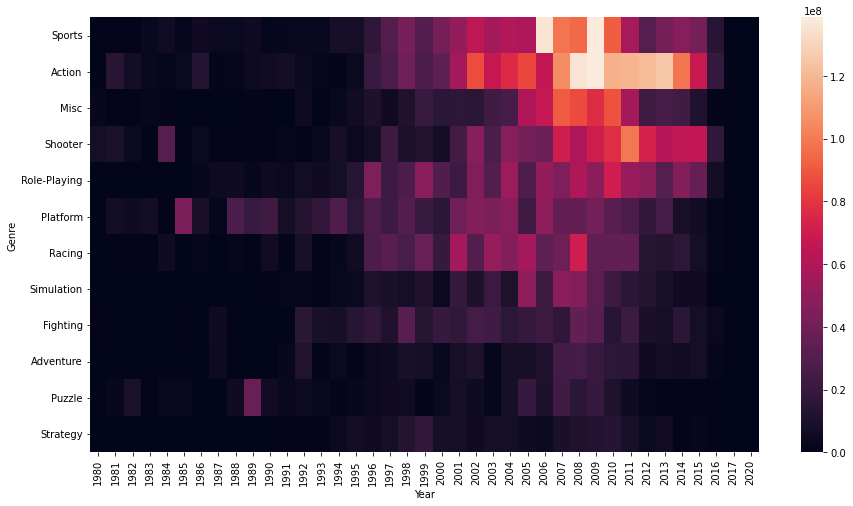

두 개의 카테고리 값에 대한 값 변화를 한눈에 알기 쉽게 표시해주는 heatmap 플롯을 이용해서 시각화 한 그래프이다. 그래프에서 밝을수록 많이 팔리고 인기있는 장르이다.
* platform은 지속적으로 인기가 있는 장르이다.
* action, shooter장르는 1995년부터 인기있기 시작했고 현재까지 꾸준히 인기가 상승하고 있다.
* sports, Role-plaing장르도 1995년부터 인기있기 시작했고 현재까지 꾸준히 인기있다.
* Music, racing, simulation장르는 2000년부터 2011년까지 반짝 인기를 끌었었다.

#3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

NA_Sales : 북미지역에서의 출고량입니다.   
EU_Sales : 유럽지역에서의 출고량입니다.   
JP_Sales : 일본지역에서의 출고량입니다.   
Other_Sales : 기타지역에서의 출고량입니다.   

##3-1.전세계에서 출고량이 많은 게임에 대한 분석

In [190]:
#전세계 출고량에 대한 데이터프레임을 만들어준다.
df_world_sales = df[['Name', 'Platform', 'Genre', 'Publisher']]
df_world_sales['Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [191]:
#Sales의 값이 높은 순서대로 정렬한 후 상위 50개의 게임만 뽑아준다.
df_world_sales = df_world_sales.sort_values(by="Sales", ascending=False).head(50)

In [192]:
df_world_sales.head(10)

,Name,Platform,Genre,Publisher,Sales
2908,Wii Sports,Wii,Sports,Nintendo,82740000.0
4199,Super Mario Bros.,NES,Platform,Nintendo,40240000.0
12579,Mario Kart Wii,Wii,Racing,Nintendo,35830000.0
3352,Wii Sports Resort,Wii,Sports,Nintendo,33000000.0
7829,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,31380000.0
1203,Tetris,GB,Puzzle,Nintendo,30260000.0
6937,New Super Mario Bros.,DS,Platform,Nintendo,30010000.0
3014,Wii Play,Wii,Misc,Nintendo,29010000.0
16531,New Super Mario Bros. Wii,Wii,Platform,Nintendo,28610000.0
10488,Duck Hunt,NES,Shooter,Nintendo,28310000.0


##3-2. 전세계 출고량 Top 50게임의 Genre를 분석해 보았다.

In [193]:
df_world_sales_Gernre = df_world_sales.groupby(['Genre']).sum()
df_world_sales_Gernre = df_world_sales_Gernre.reset_index()

In [194]:
df_world_sales_Gernre = df_world_sales_Gernre.sort_values(by="Sales", ascending=False)

Text(1.0, 1.0, 'Top 50 Sales')

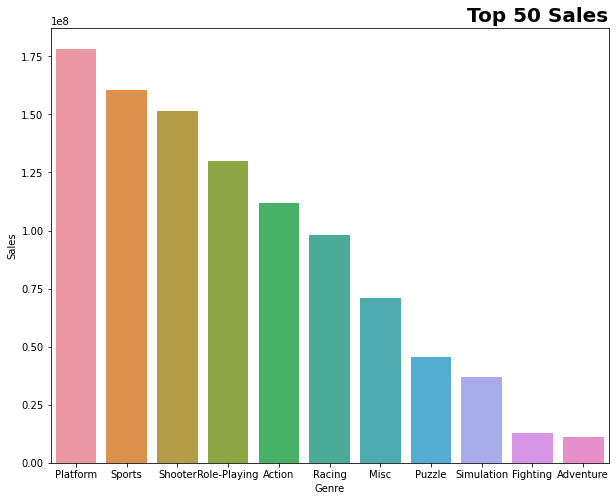

In [195]:
#바 플롯으로 나타내준다.
plt.figure(figsize=(10,8))
title_font = {
    'fontsize': 20,
    'fontweight': 'bold'}
    
sns.barplot(x = 'Genre', y = 'Sales', data = df_world_sales_Gernre)
plt.title('Top 50 Sales', fontdict=title_font, loc = 'right')

##3-3. 전세계 출고량 Top 50게임의 Platform을 분석해 보았다.

In [203]:
df_world_sales_Platform = df_world_sales.groupby(['Platform']).sum()
df_world_sales_Platform = df_world_sales_Platform.reset_index()

In [204]:
df_world_sales_Platform = df_world_sales_Platform.sort_values(by="Sales", ascending=False)

In [205]:
df_world_sales_Platform['rate'] = df_world_sales_Platform['Sales'] / df_world_sales_Platform['Sales'].sum()

In [206]:
df_world_sales_Platform

,Platform,Sales,rate
10,Wii,278470000.0,0.276263
1,DS,171560000.0,0.170200
2,GB,128690000.0,0.127670
11,X360,107000000.0,0.106152
5,NES,85830000.0,0.085150
6,PS2,76680000.0,0.076072
7,PS3,61630000.0,0.061141
8,PS4,26230000.0,0.026022
0,3DS,23540000.0,0.023353
9,SNES,20620000.0,0.020457


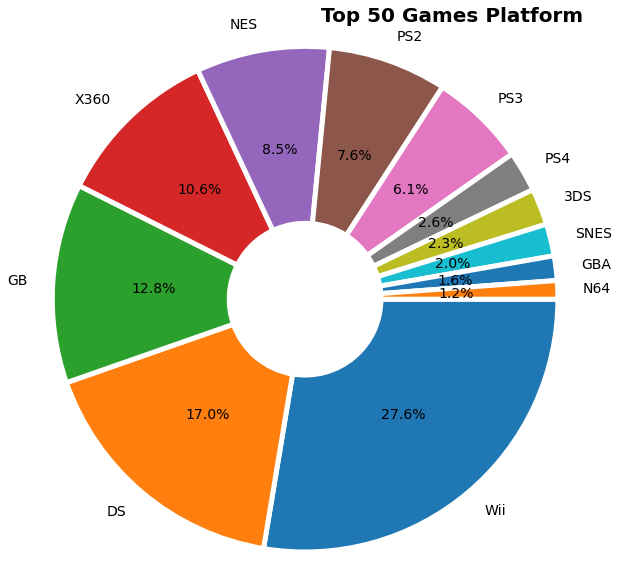

In [207]:
# Top 50 게임 Platform 파이차트
group_names = df_world_sales_Platform.Platform
group_sizes = df_world_sales_Platform.Sales
explode = df_world_sales_Platform.rate
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

fig = plt.figure(figsize=(10, 10))
plt.pie(group_sizes, 
        labels = group_names,
        autopct = '%.1f%%',
        counterclock = False,
        wedgeprops = wedgeprops,
        textprops = {'fontsize': 14}) 

title_font = {
    'fontsize': 20,
    'fontweight': 'bold'}

plt.axis('equal')
plt.title('Top 50 Games Platform', fontdict=title_font, loc = 'right')
plt.show()

##3-4. 전세계 출고량 Top 50게임의 Publisher에 대해서 분석해 보았다.

In [208]:
df_world_sales_Publisher = df_world_sales.groupby(['Publisher']).sum()
df_world_sales_Publisher = df_world_sales_Publisher.reset_index()
df_world_sales_Publisher = df_world_sales_Publisher.sort_values(by="Sales", ascending=False)
df_world_sales_Publisher['rate'] = df_world_sales_Publisher['Sales'] / df_world_sales_Publisher['Sales'].sum()
df_world_sales_Publisher

,Publisher,Sales,rate
2,Nintendo,736450000.0,0.730612
0,Activision,111140000.0,0.110259
4,Take-Two Interactive,99820000.0,0.099029
1,Microsoft Game Studios,33960000.0,0.033691
3,Sony Computer Entertainment,26620000.0,0.026409


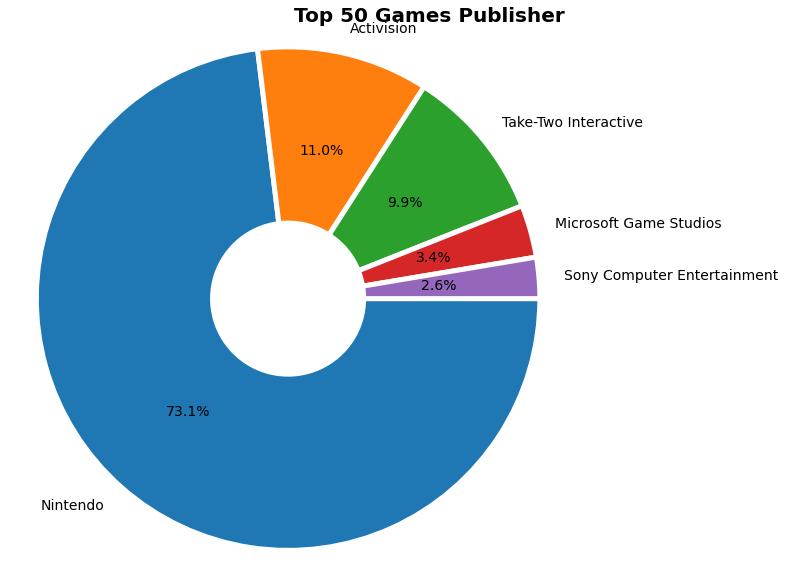

In [209]:
# Top 50 게임 Publisher 파이차트
group_names = df_world_sales_Publisher.Publisher
group_sizes = df_world_sales_Publisher.Sales
explode = df_world_sales_Publisher.rate
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

fig = plt.figure(figsize=(10, 10))
plt.pie(group_sizes, 
        labels = group_names,
        autopct = '%.1f%%',
        counterclock = False,
        wedgeprops = wedgeprops,
        textprops = {'fontsize': 14}) 

title_font = {
    'fontsize': 20,
    'fontweight': 'bold'}

plt.axis('equal')
plt.title('Top 50 Games Publisher', fontdict=title_font, loc = 'right')
plt.show()

#3번 결과

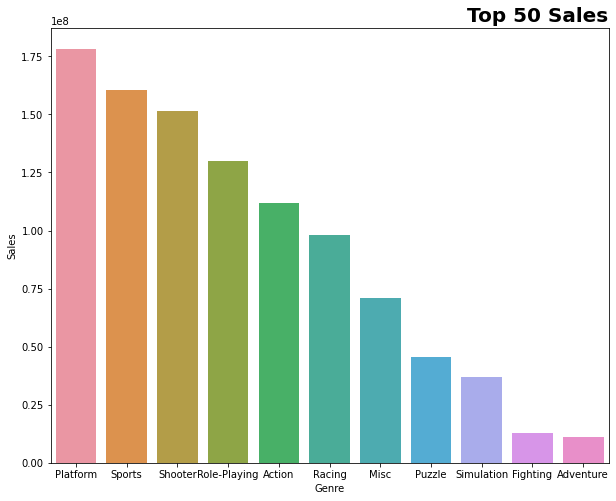

전세계적으로 많이 팔린 게임들의 장르를 분석했더니 Platform, Sport, Shooter, Role-plaing, Action등의 장르를 가진 게임의 판매량이 많았다.   
생각했던것 보다 Platform장르의 게임의 판매량이 많아서 Top 50게임들의 Platform에 대해서 분석을 진행해 보았다.

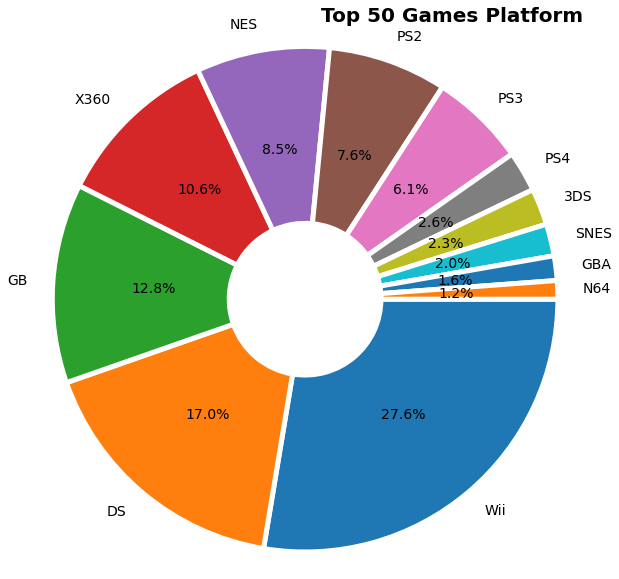

Wii, ds, NES, 3DS등 닌텐도에서 출시 했던 게임기들이 많고 PS2,PS3, PS4등 소니의 게임기들이 많이 보여서 Publisher에 대해서도 분석을 진행해 보았다. 

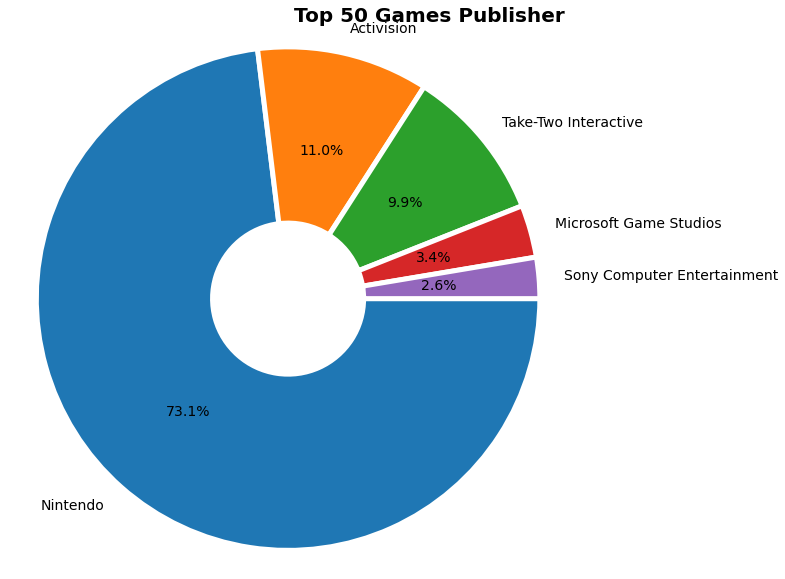

Top 50게임의 Publisher에 대해서 분석한 결과 Ninendo의 비율이 73.1%로 압도적이였다.

2번 결론에서도 언급했듯이 현재 분석하고 있는 데이터는 오프라인에서 판매된 게임들에 대한 데이터인 것 같다. 그 이유는 게임 플랫폼의 절대강자인 Steam에 대한 자료가 없고 고속인터넷과 온라인 게임과 헨드폰 게임들이 보편화 되기 시작한 2010년대의 판매량 급감도 설명할 수 있다. 또 Nintendo의 게임은 소장용이나 특유의 감성 때문에 오프라인을 통해서 구매하는 경우가 많고 Microsoft나 Sony의 게임들도 온라인을 통해 다운받는 경우가 많다고 알고 있어 위의 분석결과를 설명할 수 있다.

#4. 출시 년도와 출하량의 관계

##4-1. 라인플롯을 이용해서 시각화를 해본다.

In [224]:
df_Year_Sales = df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df_Year_Sales = df_Year_Sales.groupby(['Year']).sum()
df_Year_Sales = df_Year_Sales.reset_index()

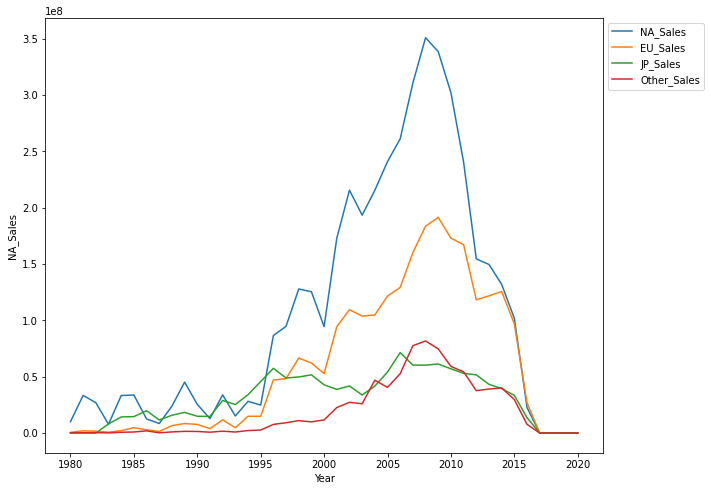

In [226]:
plt.figure(figsize=(10,8))
sns.lineplot(x = 'Year', y = 'NA_Sales', data = df_Year_Sales)
sns.lineplot(x = 'Year', y = 'EU_Sales', data = df_Year_Sales)
sns.lineplot(x = 'Year', y = 'JP_Sales', data = df_Year_Sales)
sns.lineplot(x = 'Year', y = 'Other_Sales', data = df_Year_Sales)
plt.legend(labels = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales'],loc = 2, bbox_to_anchor = (1,1))

#4번 결과

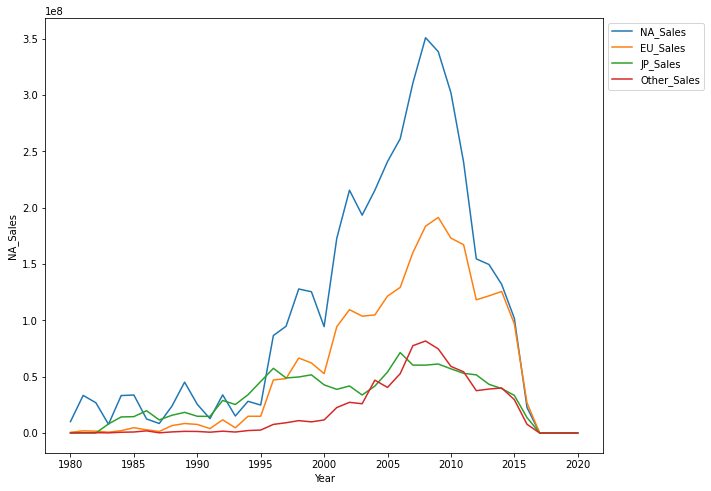

## 온라인 상에서 비디오게임 판매량 및 등급 데이터셋을 찾아서 데이터프레임의 형식으로 가져온다.
찾은 사이트 : https://www.datamanim.com/dataset/03_dataq/q1/video/main.html
여러 플랫폼의 년도별 출시된 게임 데이터셋 출처 : https://mlcourse.ai/

dataUrl = ’https://raw.githubusercontent.com/Datamanim/video/master/ 
  
Name : 게임명   
Platform : 출시 플랫폼   
Year_of_Release : 출시년도   
Genre : 장르   
Publisher : 출시 업체   
{지역별}_Sales : 판매량   
User_Score : 유저스코어 (tbd : 측정 안됨)   
Developer : 개발 업체   
Rating : 이동등급()   

#데이터 전처리 과정

In [229]:
df_online = pd.read_csv('https://raw.githubusercontent.com/Datamanim/video/master/video_games_sale.csv')

#첫번째 열은 필요하지 않기 때문에 제거해준다.
df_online.drop('Unnamed: 0', axis=1, inplace=True)
df_online.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Year_of_ten
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,2000.0
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,2000.0
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,2000.0
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,2000.0
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,2000.0


In [228]:
df_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6825 non-null   int64  
 1   Name             6825 non-null   object 
 2   Platform         6825 non-null   object 
 3   Year_of_Release  6825 non-null   float64
 4   Genre            6825 non-null   object 
 5   Publisher        6825 non-null   object 
 6   NA_Sales         6825 non-null   float64
 7   EU_Sales         6825 non-null   float64
 8   JP_Sales         6825 non-null   float64
 9   Other_Sales      6825 non-null   float64
 10  Global_Sales     6825 non-null   float64
 11  Critic_Score     6825 non-null   float64
 12  Critic_Count     6825 non-null   float64
 13  User_Score       6825 non-null   float64
 14  User_Count       6825 non-null   float64
 15  Developer        6825 non-null   object 
 16  Rating           6825 non-null   object 
 17  Year_of_ten   

In [230]:
df_online.Platform.unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'PS', 'XB', 'PC',
       'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC'], dtype=object)

In [231]:
df_online.Year_of_Release.unique()

array([2006., 2008., 2009., 2005., 2007., 2010., 2013., 2004., 2002.,
       2001., 2011., 2012., 2014., 1997., 1999., 2015., 2016., 2003.,
       1998., 1996., 2000., 1994., 1985., 1992., 1988.])

In [232]:
df_online.Global_Sales.unique()

array([8.253e+01, 3.552e+01, 3.277e+01, 2.980e+01, 2.892e+01, 2.832e+01,
       2.321e+01, 2.270e+01, 2.181e+01, 2.179e+01, 2.104e+01, 2.081e+01,
       2.015e+01, 1.627e+01, 1.615e+01, 1.529e+01, 1.498e+01, 1.473e+01,
       1.461e+01, 1.379e+01, 1.367e+01, 1.347e+01, 1.332e+01, 1.310e+01,
       1.284e+01, 1.266e+01, 1.263e+01, 1.261e+01, 1.213e+01, 1.212e+01,
       1.166e+01, 1.135e+01, 1.101e+01, 1.095e+01, 1.081e+01, 1.070e+01,
       1.060e+01, 1.050e+01, 1.025e+01, 1.012e+01, 9.900e+00, 9.860e+00,
       9.720e+00, 9.710e+00, 9.490e+00, 9.440e+00, 9.360e+00, 9.310e+00,
       9.160e+00, 8.910e+00, 8.790e+00, 8.570e+00, 8.490e+00, 8.380e+00,
       8.270e+00, 8.160e+00, 8.050e+00, 8.010e+00, 7.860e+00, 7.720e+00,
       7.690e+00, 7.660e+00, 7.590e+00, 7.510e+00, 7.380e+00, 7.320e+00,
       7.200e+00, 7.170e+00, 7.160e+00, 7.150e+00, 7.130e+00, 7.090e+00,
       7.070e+00, 6.900e+00, 6.830e+00, 6.760e+00, 6.750e+00, 6.740e+00,
       6.680e+00, 6.660e+00, 6.620e+00, 6.490e+00, 

감사하게도 전처리가 잘 되어있는 데이터이다.

# 5-1.전세계 출고량 Top 50게임의 Genre를 분석해 보았다.

In [234]:
#판매량 Top 50인 게임들에 대한 분석을 진행한다.
df_online_Top = df_online[['Name', 'Platform', 'Genre', 'Publisher', 'Global_Sales']]
#Sales의 값이 높은 순서대로 정렬한 후 상위 50개의 게임만 뽑아준다.
df_online_Top = df_online_Top.sort_values(by="Global_Sales", ascending=False).head(50)
df_online_Top.head()

,Name,Platform,Genre,Publisher,Global_Sales
0,Wii Sports,Wii,Sports,Nintendo,82.53
1,Mario Kart Wii,Wii,Racing,Nintendo,35.52
2,Wii Sports Resort,Wii,Sports,Nintendo,32.77
3,New Super Mario Bros.,DS,Platform,Nintendo,29.80
4,Wii Play,Wii,Misc,Nintendo,28.92


In [235]:
df_online_Top_Gernre = df_online_Top.groupby(['Genre']).sum()
df_online_Top_Gernre = df_online_Top_Gernre.reset_index()
df_online_Top_Gernre = df_online_Top_Gernre.sort_values(by="Global_Sales", ascending=False)

Text(1.0, 1.0, 'Top 50 Sales')

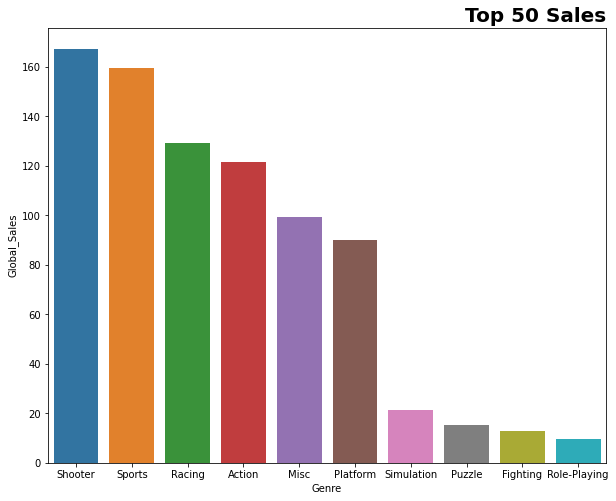

In [236]:
#바 플롯으로 나타내준다.
plt.figure(figsize=(10,8))
title_font = {
    'fontsize': 20,
    'fontweight': 'bold'}
    
sns.barplot(x = 'Genre', y = 'Global_Sales', data = df_online_Top_Gernre)
plt.title('Top 50 Sales', fontdict=title_font, loc = 'right')

#5-2.전세계 출고량 Top 50게임의 Platform을 분석해 보았다.

In [237]:
df_online_Top_Platform = df_online_Top.groupby(['Platform']).sum()
df_online_Top_Platform = df_online_Top_Platform.reset_index()
df_online_Top_Platform = df_online_Top_Platform.sort_values(by="Global_Sales", ascending=False)
df_online_Top_Platform['rate'] = df_online_Top_Platform['Global_Sales'] / df_online_Top_Platform['Global_Sales'].sum()
df_online_Top_Platform

,Platform,Global_Sales,rate
6,Wii,296.30,0.358478
7,X360,156.82,0.189728
1,DS,109.49,0.132466
4,PS3,101.94,0.123332
3,PS2,76.70,0.092795
0,3DS,42.53,0.051455
2,PS,30.16,0.036489
5,PS4,12.61,0.015256


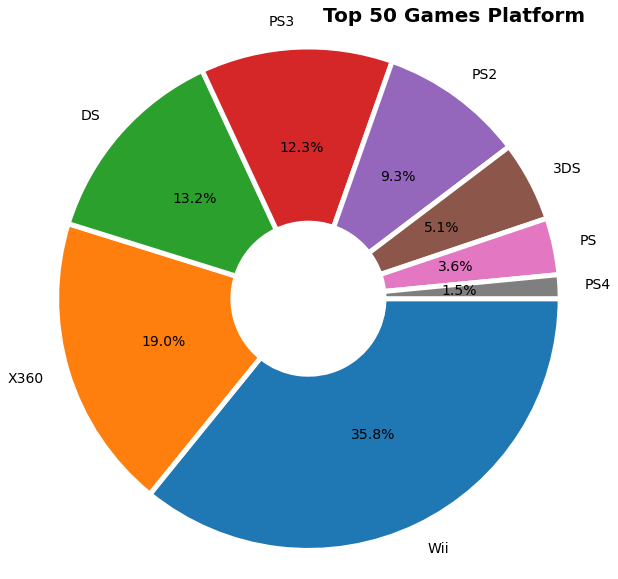

In [238]:
# Top 50 게임 Platform 파이차트
group_names = df_online_Top_Platform.Platform
group_sizes = df_online_Top_Platform.Global_Sales
explode = df_online_Top_Platform.rate
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

fig = plt.figure(figsize=(10, 10))
plt.pie(group_sizes, 
        labels = group_names,
        autopct = '%.1f%%',
        counterclock = False,
        wedgeprops = wedgeprops,
        textprops = {'fontsize': 14}) 

title_font = {
    'fontsize': 20,
    'fontweight': 'bold'}

plt.axis('equal')
plt.title('Top 50 Games Platform', fontdict = title_font, loc = 'right')
plt.show()